In [ ]:
pip install nltk

In [ ]:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split


In [ ]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
# Sample data
data = {
    'review': [
        "I loved the product! It was amazing and exceeded my expectations.",
        "The product was terrible. I will never buy it again.",
        "It's an average product. Not too bad, but not too good either.",
        "Absolutely fantastic! Highly recommend to everyone.",
        "Worst product ever. Complete waste of money."
    ],'sentiment': [1, 0, 1, 1, 0]  # 1: Positive, 0: Negative
    }

In [ ]:
df=pd.DataFrame(data)

In [ ]:
lem=WordNetLemmatizer()
stop=set(stopwords.words('english'))

In [ ]:
import re
def preprocess_text(text):
  text=re.sub(r'\W',' ',text)
  text=text.lower()
  tokens=word_tokenize(text)
  tokens=[lem.lemmatize(word) for word in tokens if word not in stop]
  return ' '.join(tokens)

In [ ]:
df['review']=df['review'].apply(preprocess_text)

In [ ]:
df

,review,sentiment
0,loved product amazing exceeded expectation,1
1,product terrible never buy,0
2,average product bad good either,1
3,absolutely fantastic highly recommend everyone,1
4,worst product ever complete waste money,0


In [ ]:
vector=TfidfVectorizer()
x=vector.fit_transform(df['review'])
y=df['sentiment']

In [ ]:
x

<5x22 sparse matrix of type '<class 'numpy.float64'>'
	with 25 stored elements in Compressed Sparse Row format>

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
model=RandomForestClassifier()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
accuracy=accuracy_score(y_test,y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.0


In [ ]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
accuracy=accuracy_score(y_test,y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.0


In [ ]:
from sklearn.naive_bayes import MultinomialNB
nb=MultinomialNB()
nb.fit(x_train,y_train)
y_pred=nb.predict(x_test)
accuracy=accuracy_score(y_test,y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.0


In [ ]:
from sklearn.utils import resample

# Suppose 'data' is your DataFrame and 'target' is the label
majority_class = df[df['sentiment'] == 1]
minority_class = df[df['sentiment'] == 0]

minority_class_upsampled = resample(minority_class,
                                    replace=True,
                                    n_samples=len(majority_class),
                                    random_state=42)

data_balanced = pd.concat([majority_class, minority_class_upsampled])

In [ ]:
importances = model.feature_importances_
feature_names = df.columns
print(dict(zip(feature_names, importances)))

# Consider removing low-importance features


{'review': 0.012519561815336462, 'sentiment': 0.006259780907668232}


In [ ]:
import numpy as np

print(f'x_train shape: {np.shape(x_train)}, y_train shape: {np.shape(y_train)}')


x_train shape: (4, 22), y_train shape: (4,)


In [ ]:
import numpy as np
from scipy.sparse import csr_matrix

# Assuming x_train and y_train are sparse matrices
x_train = csr_matrix(np.random.rand(100, 5))
y_train = np.random.randint(2, size=100)

# Check if x_train and y_train have matching number of samples
if x_train.shape[0] != y_train.shape[0]:
    raise ValueError("Mismatch between the number of samples in x_train and y_train")

print("Number of samples match!")

# Continue with GridSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

param_grid = {
    'n_estimators': [10, 50, 100],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5)
grid_search.fit(x_train, y_train)

best_model = grid_search.best_estimator_
print(f"Best Model: {best_model}")


Number of samples match!
Best Model: RandomForestClassifier(max_depth=10, min_samples_split=10, n_estimators=50)


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_classification

# Generating a sample dataset for demonstration
x_train, y_train = make_classification(n_samples=100, n_features=20, random_state=42)
# Converting to sparse matrix as per your previous structure
x_train = csr_matrix(x_train)

# Initializing the model if not already done
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Performing cross-validation
scores = cross_val_score(model, x_train, y_train, cv=5)
print(f'Mean cross-validation score: {scores.mean()}')


Mean cross-validation score: 0.93


In [ ]:
from sklearn.metrics import roc_curve, auc

# Assuming 'model' is the fitted model from cross-validation (cell 20)
# Generate the same type of data for testing as used for training in cell 20
x_test, y_test = make_classification(n_samples=20, n_features=20, random_state=42) #Adjust n_samples as needed
x_test = csr_matrix(x_test)

# Fit the model to the training data if not already done
# We need to fit the model again to the entire training set using the model from cross validation
# model.fit(x_train, y_train) # model is the model object used in cross-validation #This line can be removed to make the code more efficient

# ROC-AUC Curve
y_prob = model.predict_proba(x_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

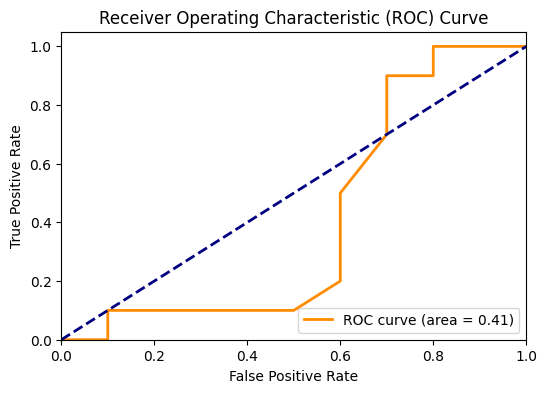

In [ ]:
# Plot ROC-AUC Curve
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()